k-최근접 이웃 회귀에 대해 알아보자. 이에 대한 내용은 [혼자 공부하는 머신러닝+딥러닝](혼자 공부하는 머신러닝+딥러닝)의 Chapter 3-1를 기반으로 하며 이곳에 사용한 데이터를 사용할 예정이다. 여기서 사용하는 데이터는 농어 데이터를 사용하는데 기본적인 배경을 먼저 보자.

> 여름 농어 철로 농어 주문이 크게 늘어나자 한빛 마켓은 업계 최초로 농어를 무게 단위로 판매하려 합니다. 농어를 마리당 가격으로 판매했을 때 기대보다 볼품없는 농어를 받은 고객이 항의하는 일이발생했기 때문입니다. 무게 단위로 가격을 책정하면 고객들도 합리적이라고 생각하겠죠? 그런데 공급처에서 생선 무게를 잘못 측정해서 보냈습니다. 큰일이네요.

농어의 길이, 높이, 두께를 측정한 데이터가 주어져 있다. 또한 샘플로 56개의 무게를 측정한 데이터도 있으니 농어의 무게를 측정하기에 좋은 데이터로 보인다. 그러나 길이, 높이, 두께중 **길이** 만 사용해서 진행 한다. K-최근접 이웃 회귀를 하기전에 우선 K-최근접 이웃 분류와 회귀 알고리즘을 간단히 알아보자.

## 라이브러리

이제 다음을 통해 하나씩 확인해보자. 우선 이번에 필요한 라이브러리를 먼저 확인해보자. 각각 라이브러리의 사용 목적은 다음과 같다.

 - numpy
    - 사이킷런에서 사용할 훈련 세트(2차원 배열) 사용 
 - matplotlib.pyplot
   - 산점도 시각화 사용
 - sklearn.model_selection
    - 사이킷런의 train_test_split()함수를 통해 Train/test set 나눔 
 - sklearn.neighbors
    - k-최근접 이웃 회귀 알고리즘의 KNeighborsRegressor() 모델 사용
 - sklearn.metrics
    - mean_absolute_error() 함수를 사용하여 mae를구함

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_absolute_error 


## 데이터 준비

이제 농어의 데이터를 준비 하자 데이터는 다음과 같다. 각각 길이와, 무게로 주어져 있다.

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

## 산점도

이제 이렇게 주어진 데이터가 어떤 형태를 나타내는진 산점도로 그려보자. matplotlib.plot의 sactter()함수를 사용한다. 산점도를 통해 확인할 수 있듯, 길이가 커짐에 따라 무게가 늘어나는 것을 확인할 수 있다.


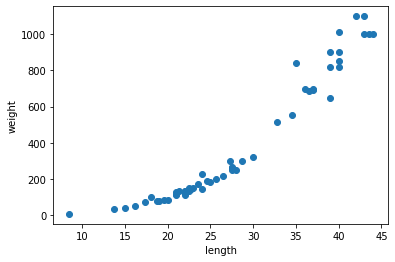

In [3]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [5]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [6]:
knr = KNeighborsRegressor()
knr.n_neighbors = 5
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [7]:
print(knr.score(test_input, test_target))

0.992809406101064


In [8]:
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862
